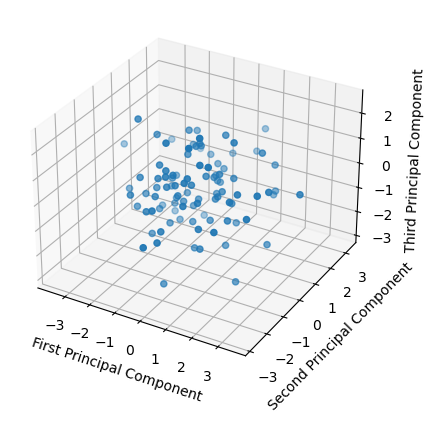

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Generate some sample data
np.random.seed(42)
X = np.random.randn(100, 10)

# Step 1: Standardize the dataset (optional)
X_standardized = (X - X.mean(axis=0)) / X.std(axis=0)

# Step 2: Calculate the covariance matrix
cov_matrix = np.cov(X_standardized.T)

# Step 3: Compute the eigenvalues and eigenvectors of the covariance matrix
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

# Step 4: Sort the eigenvalues and corresponding eigenvectors in decreasing order
eigenvalue_indices = np.argsort(eigenvalues)[::-1]
sorted_eigenvalues = eigenvalues[eigenvalue_indices]
sorted_eigenvectors = eigenvectors[:, eigenvalue_indices]

# Step 5: Select the top k eigenvectors (k is the number of principal components)
k = 3
top_k_eigenvectors = sorted_eigenvectors[:, :k]

# Step 6: Project the original data onto the top k eigenvectors
X_pca = np.dot(X_standardized, top_k_eigenvectors)

# Visualize the result in a 3D scatter plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2])
ax.set_xlabel('First Principal Component')
ax.set_ylabel('Second Principal Component')
ax.set_zlabel('Third Principal Component')
plt.show()


downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to C:\Users\nnnam1\scikit_learn_data


c:\users\nnnam1\tf_tts_env\lib\site-packages\matplotlib\collections.py:192: ComplexWarning: Casting complex values to real discards the imaginary part
  offsets = np.asanyarray(offsets, float)
c:\users\nnnam1\tf_tts_env\lib\site-packages\matplotlib\cbook\__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
c:\users\nnnam1\tf_tts_env\lib\site-packages\matplotlib\collections.py:551: ComplexWarning: Casting complex values to real discards the imaginary part
  (np.asanyarray(self.convert_xunits(offsets[:, 0]), float),
c:\users\nnnam1\tf_tts_env\lib\site-packages\matplotlib\collections.py:552: ComplexWarning: Casting complex values to real discards the imaginary part
  np.asanyarray(self.convert_yunits(offsets[:, 1]), float)))
c:\users\nnnam1\tf_tts_env\lib\site-packages\matplotlib\colors.py:389: ComplexWarning: Casting complex values to real discards the imaginary part
  c = tuple(map(float, c))


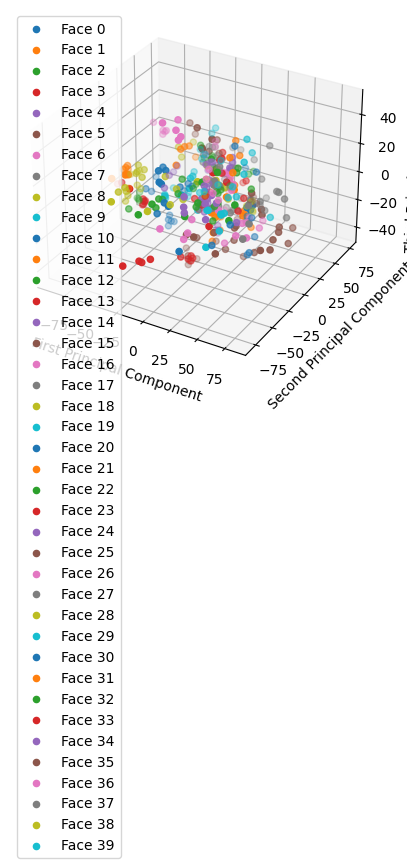

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_olivetti_faces
from mpl_toolkits.mplot3d import Axes3D

def pca_from_scratch(X, n_components):
    X_standardized = (X - X.mean(axis=0)) / X.std(axis=0)
    cov_matrix = np.cov(X_standardized.T)
    eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)
    eigenvalue_indices = np.argsort(eigenvalues)[::-1]
    sorted_eigenvectors = eigenvectors[:, eigenvalue_indices]
    top_k_eigenvectors = sorted_eigenvectors[:, :n_components]
    X_pca = np.dot(X_standardized, top_k_eigenvectors)
    return X_pca

# Load the Olivetti faces dataset (grayscale images of size 64x64)
data = fetch_olivetti_faces()
images = data.images
targets = data.target

# Reshape the images to 1D arrays (4096 features)
X = images.reshape((images.shape[0], -1))

# Apply PCA from scratch to reduce dimensionality to 3 components
n_components = 3
X_pca = pca_from_scratch(X, n_components)

# Visualize the result in a 3D scatter plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

for target in np.unique(targets):
    mask = targets == target
    ax.scatter(X_pca[mask, 0], X_pca[mask, 1], X_pca[mask, 2], label=f'Face {target}')

ax.set_xlabel('First Principal Component')
ax.set_ylabel('Second Principal Component')
ax.set_zlabel('Third Principal Component')
ax.legend()
plt.show()


In [11]:
n_components = 1000
X_pca = pca_from_scratch(X, n_components)

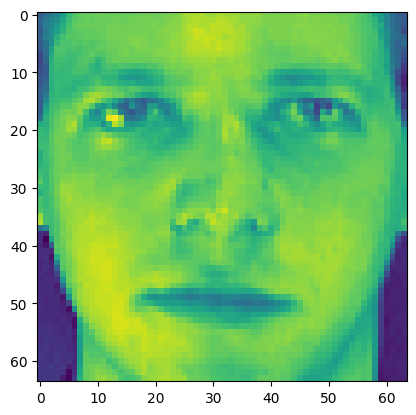

In [8]:
plt.imshow(images[0])

In [9]:
X_pca

array([[ 45.26837974+0.j,   2.17394644+0.j, -21.81839729+0.j],
       [ 11.86003686+0.j,  41.95491045+0.j,   3.10510875+0.j],
       [ 39.27399127+0.j,   7.27784437+0.j, -11.94020124+0.j],
       ...,
       [-10.81211064+0.j,   9.58496726+0.j,  24.19494596+0.j],
       [ 36.93931703+0.j, -56.96338996+0.j,  -5.20919631+0.j],
       [  8.68293627+0.j, -15.29022361+0.j,   9.25133724+0.j]])

In [17]:
import numpy as np 
from scipy import misc    
import imageio # for loading image

In [21]:
!mkdir unpadded

In [55]:
path = r'Downloads/YALE.tar/YALE/faces/' # path to the database 
ids = range(1, 16) # 15 persons
states = ['centerlight', 'glasses', 'happy', 'leftlight', 
          'noglasses', 'normal', 'rightlight','sad', 
          'sleepy', 'surprised', 'wink' ]
prefix = 'subject'
surfix = '.pgm'

im = imageio.imread(fn)
h = 243 # hight 
w = 320 # width
D = h * w
N = len(states)*15 

X = np.zeros((D, N))

C:\Users\nnnam1\AppData\Local\Temp\ipykernel_18636\1949075965.py:9: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  im = imageio.imread(fn)


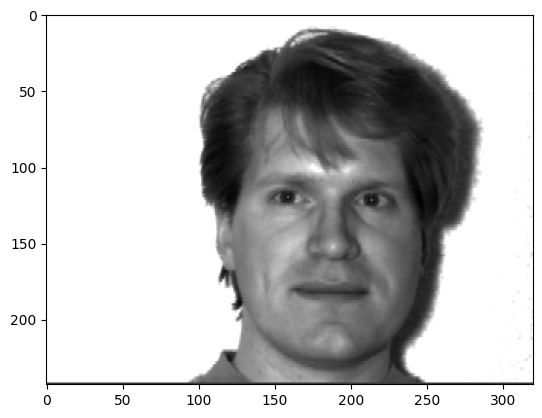

In [63]:
plt.imshow(im)

In [56]:
# collect all data
cnt = 0 
for person_id in range(1, 16):
    for state in states:
        fn = path + prefix + str(person_id).zfill(2) + '.' + state + surfix
        X[:, cnt] = imageio.imread(fn).reshape(D)
        cnt += 1

C:\Users\nnnam1\AppData\Local\Temp\ipykernel_18636\2745437872.py:6: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  X[:, cnt] = imageio.imread(fn).reshape(D)


In [ ]:
import matplotlib.pyplot as plt
for i in range(U.shape[1]):
    plt.axis('off')
    f1 = plt.imshow(U[:, i].reshape(243, 320), interpolation='nearest')
    f1.axes.get_xaxis().set_visible(False)
    f1.axes.get_yaxis().set_visible(False)
#     f2 = plt.imshow(, interpolation='nearest' )
    plt.gray()
    fn = 'eigenface' + str(i).zfill(2) + '.png'
    plt.savefig(fn, bbox_inches='tight', pad_inches=0)
    plt.show()

In [57]:
def pca_from_scratch(X, n_components):
    X_standardized = (X - X.mean(axis=0)) / X.std(axis=0)
    cov_matrix = np.cov(X_standardized.T)
    eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)
    eigenvalue_indices = np.argsort(eigenvalues)[::-1]
    sorted_eigenvectors = eigenvectors[:, eigenvalue_indices]
    top_k_eigenvectors = sorted_eigenvectors[:, :n_components]
    X_pca = np.dot(X_standardized, top_k_eigenvectors)
    return X_pca

In [91]:
X.shape

(77760, 165)

In [92]:
X_standardized = (X - X.mean(axis=0))

In [93]:
X_standardized

array([[ -54.46459619,  -70.72350823,  -68.4869213 , ...,  -54.55394805,
         -50.63674126,  -60.3901749 ],
       [ -54.46459619,  -70.72350823,  -68.4869213 , ...,  -54.55394805,
         -50.63674126,  -60.3901749 ],
       [ -54.46459619,  -70.72350823,  -68.4869213 , ...,  -54.55394805,
         -50.63674126,  -60.3901749 ],
       ...,
       [-116.46459619, -132.72350823, -130.4869213 , ..., -116.55394805,
        -112.63674126, -122.3901749 ],
       [-116.46459619, -132.72350823, -130.4869213 , ..., -116.55394805,
        -112.63674126, -122.3901749 ],
       [-116.46459619, -132.72350823, -130.4869213 , ..., -116.55394805,
        -112.63674126, -122.3901749 ]])

In [ ]:
S = 

In [90]:
 X.mean(axis=0).shape

(165,)

In [89]:
X_pca.shape

(77760, 100)

In [84]:
X[:, 0].shape

(77760,)

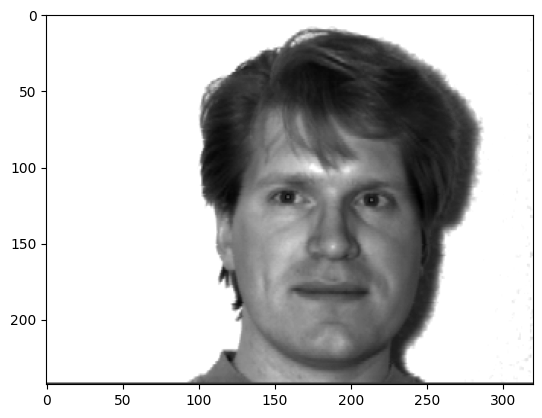

In [86]:
plt.imshow(X[:, 0].reshape(243, 320))

In [79]:
X_pca = pca_from_scratch(X,100)

In [69]:
X_pca.shape

(77760, 100)

In [ ]:
X_pca

In [58]:
from sklearn.decomposition import PCA
pca = PCA(n_components=100) # k = 100 
pca.fit(X.T)

PCA(n_components=100)

In [97]:
pca.mean_.shape

(77760,)

In [87]:
U = pca.components_.T

In [98]:
U.shape

(77760, 100)

In [76]:
X_pca

array([[-7.79582754e+00+0.j, -1.06913296e+00+0.j, -1.50033211e+00+0.j,
        ..., -1.40913418e-01+0.j, -2.92133849e-02+0.j,
         1.00181551e-01+0.j],
       [-7.67776444e+00+0.j, -1.36530895e+00+0.j, -1.54911478e+00+0.j,
        ..., -1.57371554e-01+0.j, -4.41478620e-02+0.j,
         1.05057376e-01+0.j],
       [-7.59592064e+00+0.j, -1.50055275e+00+0.j, -1.47350542e+00+0.j,
        ..., -1.67078710e-01+0.j, -3.42402725e-02+0.j,
         1.41301866e-01+0.j],
       ...,
       [-1.56354102e+01+0.j, -1.50625353e+00+0.j, -1.11557246e+00+0.j,
        ..., -1.28957957e-01+0.j, -1.04714522e-03+0.j,
         1.09137979e-01+0.j],
       [-1.56354102e+01+0.j, -1.50625353e+00+0.j, -1.11557246e+00+0.j,
        ..., -1.28957957e-01+0.j, -1.04714522e-03+0.j,
         1.09137979e-01+0.j],
       [-1.56354102e+01+0.j, -1.50625353e+00+0.j, -1.11557246e+00+0.j,
        ..., -1.28957957e-01+0.j, -1.04714522e-03+0.j,
         1.09137979e-01+0.j]])

In [81]:
U

array([[-3.64752681e-04, -1.07381255e-03, -1.09851500e-04, ...,
        -5.71092900e-05, -1.44298862e-03,  1.09244085e-03],
       [-5.91615175e-04, -1.24774588e-03, -1.08113391e-04, ...,
         5.96740418e-04, -1.66230866e-03,  8.51453515e-04],
       [-6.96818017e-04, -1.28800259e-03, -1.18437960e-04, ...,
         1.22027274e-03, -1.50586758e-03,  9.45396303e-04],
       ...,
       [ 0.00000000e+00, -0.00000000e+00, -0.00000000e+00, ...,
         0.00000000e+00, -0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00, -0.00000000e+00, -0.00000000e+00, ...,
         0.00000000e+00, -0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00, -0.00000000e+00, -0.00000000e+00, ...,
         0.00000000e+00, -0.00000000e+00,  0.00000000e+00]])

C:\Users\nnnam1\AppData\Local\Temp\ipykernel_18636\4268526376.py:4: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  im = imageio.imread(fn)


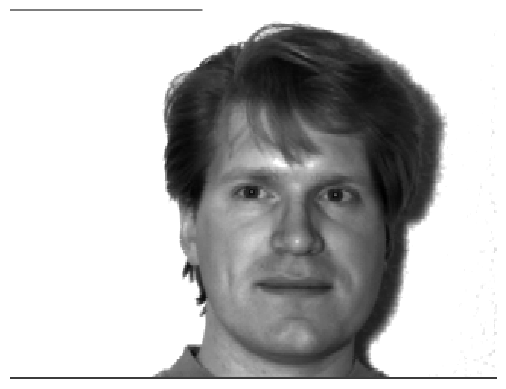

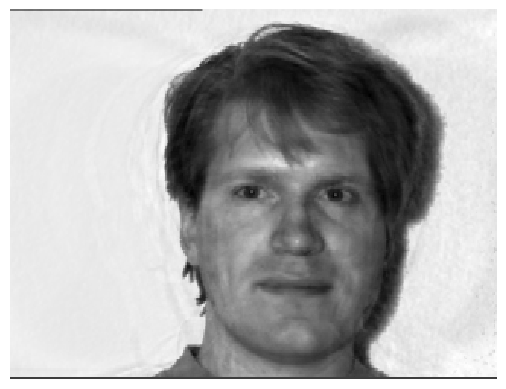

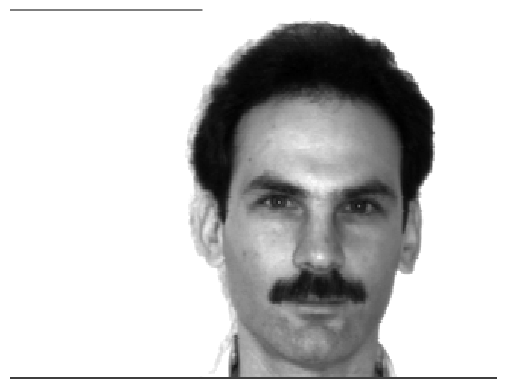

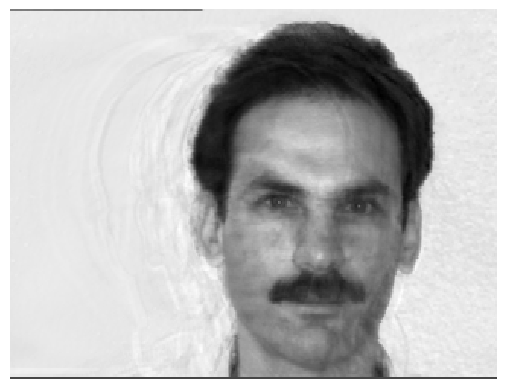

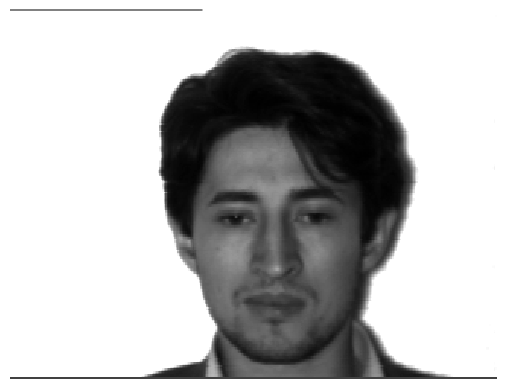

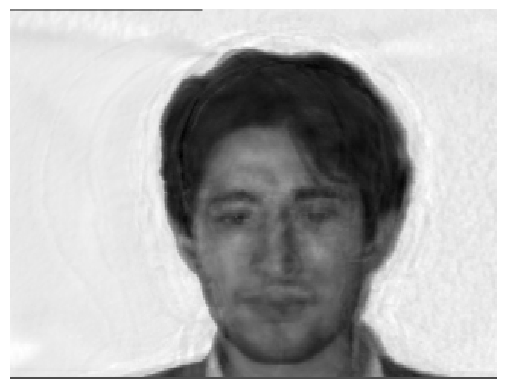

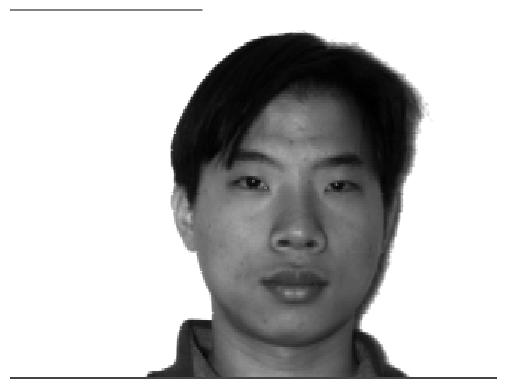

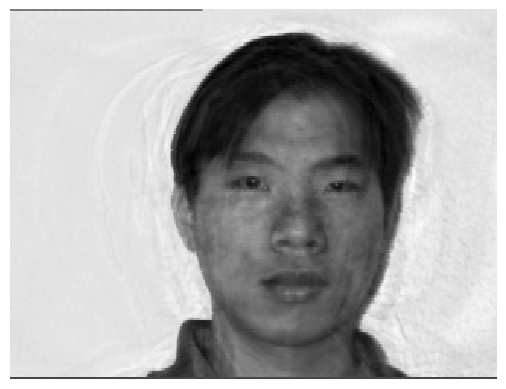

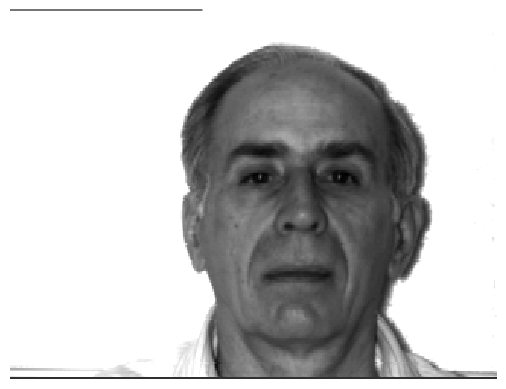

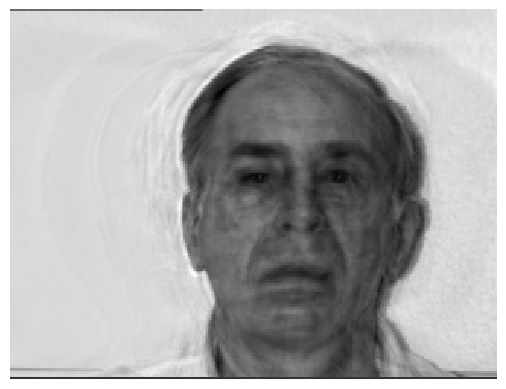

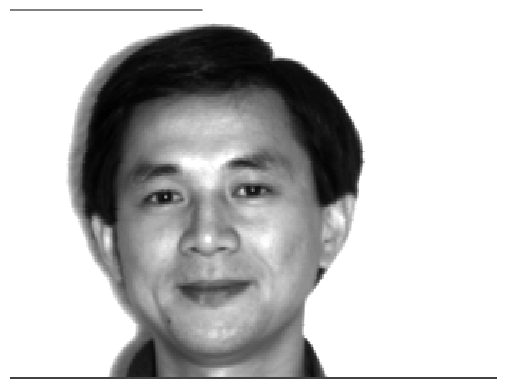

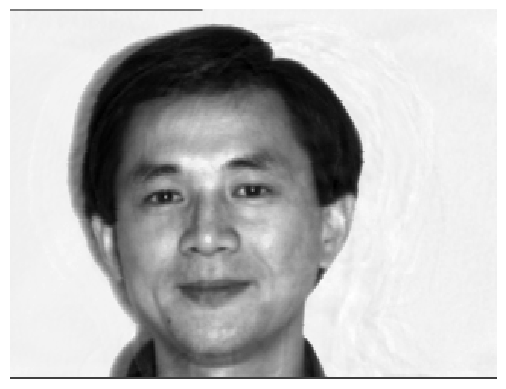

In [74]:
for person_id in range(1, 7):
    for state in ['centerlight']:
        fn = path + prefix + str(person_id).zfill(2) + '.' + state + surfix
        im = imageio.imread(fn)
        plt.axis('off')
#         plt.imshow(im, interpolation='nearest' )
        f1 = plt.imshow(im, interpolation='nearest')
        f1.axes.get_xaxis().set_visible(False)
        f1.axes.get_yaxis().set_visible(False)
        plt.gray()
        fn = 'ori' + str(person_id).zfill(2) + '.png'
        plt.savefig(fn, bbox_inches='tight', pad_inches=0)
        plt.show()
        # reshape and subtract mean, don't forget 
        x = im.reshape(D, 1) - pca.mean_.reshape(D, 1)
        # encode
        z = U.T.dot(x)
        #decode
        x_tilde = U.dot(z) + pca.mean_.reshape(D, 1)

        # reshape to orginal dim
        im_tilde = x_tilde.reshape(243, 320)
        plt.axis('off')
#         plt.imshow(im_tilde, interpolation='nearest' )
        f1 = plt.imshow(im_tilde, interpolation='nearest')
        f1.axes.get_xaxis().set_visible(False)
        f1.axes.get_yaxis().set_visible(False)
        plt.gray()
        fn = 'res' + str(person_id).zfill(2) + '.png'
        plt.savefig(fn, bbox_inches='tight', pad_inches=0)
        plt.show()

In [72]:
im_tilde

array([[-13431952.52637548+0.j, -10661518.6988116 +0.j,
         -8674295.14265239+0.j, ...,  19689073.91526818+0.j,
         18513442.76259278+0.j,  16943226.06824549+0.j],
       [ 21490853.80088506+0.j,  25114451.73035193+0.j,
         27172800.43825217+0.j, ...,  17327543.86670472+0.j,
         17512890.37691037+0.j,  17585312.44262308+0.j],
       [ 22343394.62798314+0.j,  22340889.35835981+0.j,
         22180918.77227944+0.j, ...,  16159878.41658705+0.j,
         16064035.91696346+0.j,  15849138.90643404+0.j],
       ...,
       [ 40047391.69178551+0.j,  41527737.05467137+0.j,
         41506063.07198287+0.j, ..., -30903473.66467354+0.j,
        -29441324.07045545+0.j, -30462426.87138643+0.j],
       [ 38892585.89895018+0.j,  40147600.43543602+0.j,
         39795257.78322858+0.j, ..., -31290268.39215658+0.j,
        -29185751.11495742+0.j, -29570007.17312776+0.j],
       [-32115236.868335  +0.j, -32115236.868335  +0.j,
        -32115236.868335  +0.j, ..., -32115236.868335  +0.j,
 

In [75]:
im_tilde

array([[131.06384428, 130.38639607, 130.02586744, ..., 254.97226361,
        256.43866917, 254.24933495],
       [256.90324136, 255.7011956 , 254.67360092, ..., 255.33110805,
        255.77589566, 253.83735476],
       [257.27533206, 257.428573  , 254.82116085, ..., 255.13013198,
        255.2600537 , 256.76323298],
       ...,
       [258.98941978, 258.72379571, 258.06725814, ..., 255.6843496 ,
        257.18041419, 256.95031191],
       [258.39114891, 258.04267438, 257.52099761, ..., 255.73428879,
        257.95892532, 257.23439006],
       [ 68.        ,  68.        ,  68.        , ...,  68.        ,
         68.        ,  68.        ]])

In [99]:
import numpy as np

def standardize_data(X):
    mean = np.mean(X, axis=0)
    std_dev = np.std(X, axis=0)
    return (X - mean) / std_dev

def standardize_data(X):
    mean = np.mean(X, axis=0)
    std_dev = np.std(X, axis=0)
    return (X - mean) / std_dev


def compute_covariance_matrix(X):
    return np.cov(X.T)

def pca(X, n_components):
    # Step 1: Standardize the data
    X_std = standardize_data(X)
    
    # Step 2: Compute the covariance matrix
    covariance_matrix = compute_covariance_matrix(X_std)
    
    # Step 3: Calculate eigenvectors and eigenvalues
    eigenvalues, eigenvectors = np.linalg.eig(covariance_matrix)
    
    # Step 4: Sort eigenvectors based on eigenvalues
    eig_pairs = [(eigenvalues[i], eigenvectors[:, i]) for i in range(len(eigenvalues))]
    eig_pairs.sort(key=lambda x: x[0], reverse=True)
    
    # Step 5: Select top n_components eigenvectors to form the projection matrix
    projection_matrix = np.hstack([pair[1].reshape(-1, 1) for pair in eig_pairs[:n_components]])
    
    # Step 6: Transform the original dataset using the projection matrix
    return X_std @ projection_matrix

# Example usage
X = np.array([[2.5, 2.4], [0.5, 0.7], [2.2, 2.9], [1.9, 2.2], [3.1, 3.0], [2.3, 2.7], [2, 1.6], [1, 1.1], [1.5, 1.6], [1.1, 0.9]])
n_components = 2

transformed_data = pca(X, n_components)
print(transformed_data)


[[ 1.08643242 -0.22352364]
 [-2.3089372   0.17808082]
 [ 1.24191895  0.501509  ]
 [ 0.34078247  0.16991864]
 [ 2.18429003 -0.26475825]
 [ 1.16073946  0.23048082]
 [-0.09260467 -0.45331721]
 [-1.48210777  0.05566672]
 [-0.56722643  0.02130455]
 [-1.56328726 -0.21536146]]
